In [31]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [32]:
model = torch.jit.load(r'/content/best_model.pt')
model.eval()

RecursiveScriptModule(
  original_name=HandwritingRecognitionModel
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (conv2): RecursiveScriptModule(original_name=Conv2d)
  (pool): RecursiveScriptModule(original_name=MaxPool2d)
  (fc1): RecursiveScriptModule(original_name=Linear)
  (fc2): RecursiveScriptModule(original_name=Linear)
  (dropout): RecursiveScriptModule(original_name=Dropout)
  (relu): RecursiveScriptModule(original_name=ReLU)
)

In [33]:
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    image = Image.open(image_path).convert("L")
    image = transform(image).unsqueeze(0)
    return image

In [34]:
def predict_image(image_path, model):
    # Preprocess the image
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image = preprocess_image(image_path).to(device)  # Send to appropriate device

    # Perform inference
    with torch.no_grad():
        outputs = model(image)
        _, predicted_class = torch.max(outputs, 1)  # Get the class with highest score

    # EMNIST Balanced Dataset class labels
    emnist_labels = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z',
    'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r',
    't'
    ]

    return emnist_labels[predicted_class.item()]

In [35]:
def visualize_prediction(image_path, predicted_class):
    image = Image.open(image_path)
    plt.imshow(image, cmap="gray")
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis("off")
    plt.show()

In [38]:
image_path = r"/content/Example-1.png"
predicted_class = predict_image(image_path, model)
print(f"Predicted class: {predicted_class}")

Predicted class: B


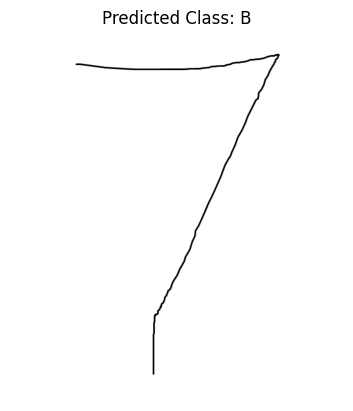

In [39]:
visualize_prediction(image_path, predicted_class)